In [438]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [329]:
df = pd.read_csv("Plants_indoor.csv")

In [330]:
df.columns

Index(['name', 'nameArabic', 'commonName', 'Toxicity', 'General care',
       'Foliage', 'Flower', 'Unnamed: 7', 'Family', 'Commercial Light levels',
       'brightness', 'temperature', 'solHumidity', 'watering',
       'suggestedSoilMix', 'Problems', 'description'],
      dtype='object')

In [331]:
df = df.drop(columns=["nameArabic", "Toxicity","General care","Foliage","Flower","Commercial Light levels","Problems","Unnamed: 7"])

In [332]:
df.columns

Index(['name', 'commonName', 'Family', 'brightness', 'temperature',
       'solHumidity', 'watering', 'suggestedSoilMix', 'description'],
      dtype='object')

In [333]:
df["Family"].unique()

array(['https://en.wikipedia.org/wiki/Malvaceae',
       'https://en.wikipedia.org/wiki/Gesneriaceae', 'Acoraceae',
       'Pteridaceae', 'Crassulaceae', 'Bromeliaceae', 'Gesneriaceae',
       'Asparagaceae', 'Araceae', 'Apocynaceae', 'Asphodelaceae',
       'Acanthaceae', nan, 'Araucariaceae', 'Primulaceae', 'Aspleniaceae',
       'CACTACEAE', 'Begoniaceae', 'Nyctaginaceae', 'Araliaceae',
       'Marantaceae', 'Calceolariaceae', 'Commelinaceae', 'Arecaceae',
       'Cactaceae', 'Liliaceae', 'دراسينا'], dtype=object)

In [334]:
df["Family"].value_counts()

Family
Asparagaceae                                  8
Araceae                                       7
Bromeliaceae                                  7
Begoniaceae                                   6
Apocynaceae                                   5
Marantaceae                                   4
Arecaceae                                     4
Gesneriaceae                                  4
Asphodelaceae                                 3
Crassulaceae                                  2
Acanthaceae                                   2
Liliaceae                                     2
Aspleniaceae                                  2
CACTACEAE                                     2
Acoraceae                                     2
Araliaceae                                    2
Calceolariaceae                               1
Cactaceae                                     1
Commelinaceae                                 1
https://en.wikipedia.org/wiki/Malvaceae       1
Primulaceae                      

In [404]:
# Remplacer les liens Wikipedia par "x"
df['Family'] = df['Family'].str.split('/').str[-1]
df['Family'] = df['Family'].replace('دراسينا','Drasina')

In [336]:
df["temperature"].value_counts()

temperature
2                                                                 216
1_2                                                                13
2_3                                                                 7
1                                                                   5
3                                                                   3
1,2                                                                 2
Average: 65°F (18,33 °C)   night, 75°F (24°C) day temperatures      1
Name: count, dtype: int64

In [337]:
df['temperature'] = df['temperature'].replace('Average: 65°F (18,33 °C)   night, 75°F (24°C) day temperatures      1 ', np.nan)

In [370]:
ordinal_map = {'1': 1, '2': 3, '1_2': 2, '2_3': 4, '3': 5}
df['temperature'] = df['temperature'].map(ordinal_map)

In [338]:
df["solHumidity"].value_counts()

solHumidity
2                      177
3                       28
1                       16
1_2                     14
2_3                     11
Average: 25% to 49%      1
Name: count, dtype: int64

In [339]:
df['solHumidity'] = df['solHumidity'].replace('Average: 25% to 49%', np.nan)

In [340]:
ordinal_map = {'1': 1, '2': 3, '1_2': 2, '2_3': 4, '3': 5}

# Appliquer le mappage à la colonne 'Family'
df['solHumidity'] = df['solHumidity'].map(ordinal_map)

In [341]:
df["solHumidity"].value_counts()

solHumidity
3.0    177
5.0     28
1.0     16
2.0     14
4.0     11
Name: count, dtype: int64

In [342]:
df["watering"].value_counts()

watering
2                                                                                                                                                                                                                                     149
1                                                                                                                                                                                                                                      53
3                                                                                                                                                                                                                                      26
undefined                                                                                                                                                                                                                              17
0                                                      

In [343]:
df['watering'] = pd.to_numeric(df['watering'], errors='coerce')

In [344]:
df['watering'] = df['watering'].replace('undefined',np.nan)
df['watering'] = df['watering'].replace('2                           Try watering it about 1 to 2 times a week (yellow leaves = lay off the water). Let the soil dry on top before watering. Make sure to really keep it moist during the summer, which is when it thrives.', 2)
df['watering'] = df['watering'].replace('2                     Keep the soil moist, but let at least 1 inch of soil dry out before watering again. During the summer it requires more frequent watering.', 2)

In [345]:
df["brightness"].value_counts()

brightness
2_3                                                                                        105
2                                                                                           39
1_2                                                                                         35
1                                                                                           19
2_4                                                                                         15
2,3                                                                                         12
3                                                                                           11
3_4                                                                                          3
2022-04-03 00:00:00                                                                          2
2022-03-01 00:00:00                                                                          1
1-3                   Give this one bri

In [346]:
df['brightness'] = df['brightness'].replace('2022-04-03 00:00:00',np.nan)
df['brightness'] = df['brightness'].replace('2022-03-01 00:00:00',np.nan)
df['brightness'] = df['brightness'].replace('1-3                   Give this one bright light, but not direct sunlight.','1_3')
df['brightness'] = df['brightness'].replace('1-3  Place it in a well-lit spot where it will receive indirect lighting all day long','1_3')
df['brightness'] = df['brightness'].replace('2(  Medium-light areas: 75 ft-c to 200 ft-c)','2')
df['brightness'] = df['brightness'].replace('Bright indirect lights. Thrives in fluorescent lighting (perfect for apartment living).',np.nan)
df['brightness'] = df['brightness'].replace('2 3','2_3')
df['brightness'] = df['brightness'].replace('2,3','2_3')
df['brightness'] = df['brightness'].replace('1,2','1_2')
df['brightness'] = df['brightness'].replace('2 3','2_3')

In [347]:
ordinal_map = {'1': 1, '1_2': 2,'2': 3, '2_3': 4, '2_4': 5, '3':6}
df['brightness'] = df['brightness'].map(ordinal_map)

In [372]:
df.head

<bound method NDFrame.head of                      name                                         commonName  \
0       Abutilon hybridum  Chinese bellflower, flowering maple, parlor maple   
1      Achimenes hybrids   Magic Flower,Hot-water plant, window's tears, ...   
2          Acorus calamus                                         Sweet Flag   
3        Acorus gramineus                               Miniature Sweet Flag   
4      Adiantum raddianum                                    Maidenhair Fern   
..                    ...                                                ...   
245   Trillandsia bulbosa                                       Dancing Bulb   
246     Vriesea splendens                                      Flaming Sword   
247    Yucca elephantipes                                    Spineless Yucca   
248       Zebrina pendula                                      Wandering Jew   
249  Zygocactus truncatus                                                NaN   

         

In [428]:
df_expl = df[['brightness', 'temperature', 'solHumidity', 'watering', 'suggestedSoilMix']]
imputer = SimpleImputer(strategy='mean')
df_expl_imputed = imputer.fit_transform(df_expl)

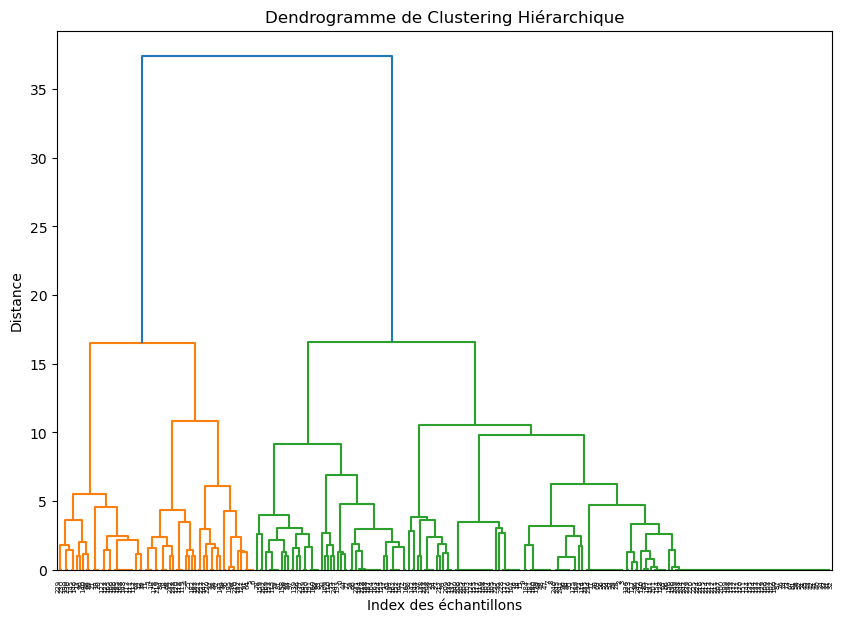

In [430]:
Z = linkage(df_expl_imputed, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Dendrogramme de Clustering Hiérarchique')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance')
plt.show()

In [432]:
df["Family"].unique()

array(['Malvaceae', 'Gesneriaceae', 'Acoraceae', 'Pteridaceae',
       'Crassulaceae', 'Bromeliaceae', 'Asparagaceae', 'Araceae',
       'Apocynaceae', 'Asphodelaceae', 'Acanthaceae', nan,
       'Araucariaceae', 'Primulaceae', 'Aspleniaceae', 'CACTACEAE',
       'Begoniaceae', 'Nyctaginaceae', 'Araliaceae', 'Marantaceae',
       'Calceolariaceae', 'Commelinaceae', 'Arecaceae', 'Cactaceae',
       'Liliaceae', 'drasina'], dtype=object)

C:\Users\meyri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


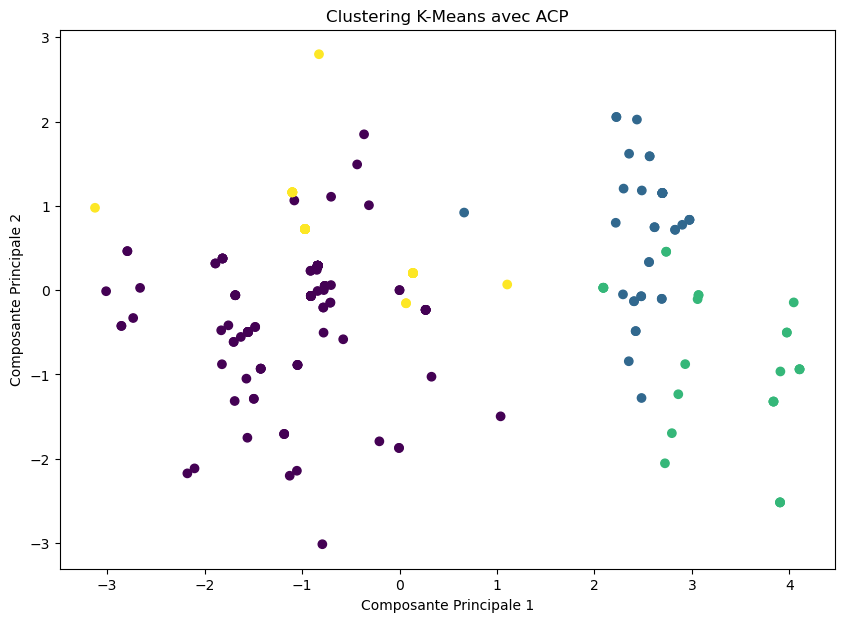

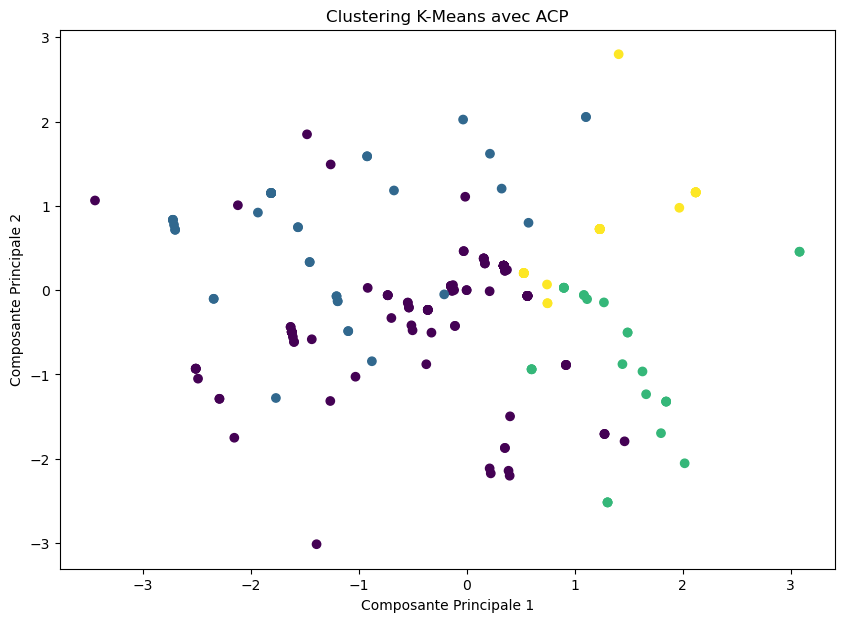

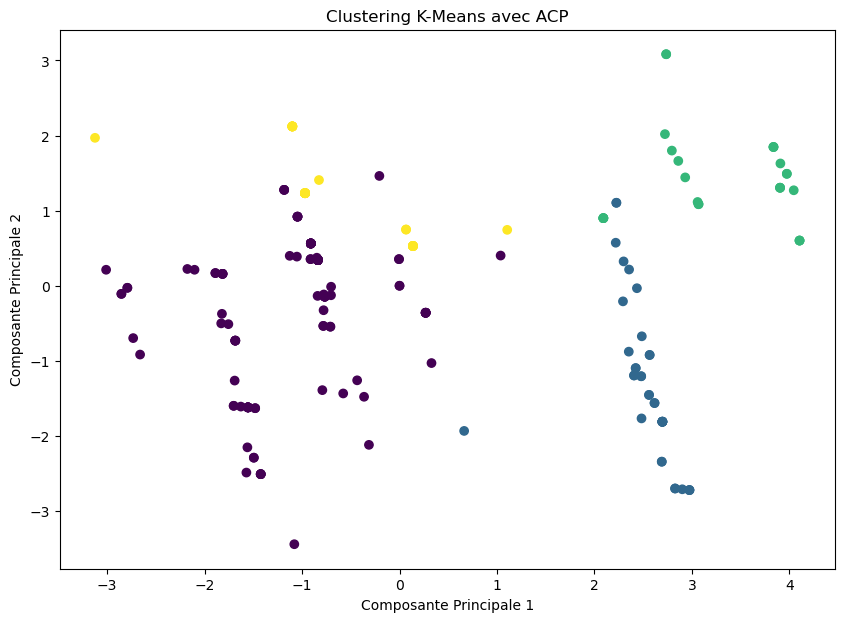

In [466]:
# Sélectionner uniquement les colonnes d'intérêt
selected_columns = df[['brightness', 'temperature', 'solHumidity', 'watering', 'suggestedSoilMix']]

# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df_expl_imputed)

# Appliquer l'ACP
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_expl_imputed)

# Créer un DataFrame avec les composantes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])
df_pca['cluster'] = df['cluster']

# Visualiser les clusters dans l'espace des composantes principales
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', marker='o')
plt.title('Clustering K-Means avec ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', marker='o')
plt.title('Clustering K-Means avec ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', marker='o')
plt.title('Clustering K-Means avec ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()